### Basic ML Solutions
# Regression Algorithm in PyTorch

In [21]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import hiddenlayer as hl

In [2]:
bike_data = pd.read_csv('bike_sharing.csv', index_col=0)
bike_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
473,474,2012-04-18,summer,1,4,0,3,1,2,0.463333,0.457038,0.569167,0.167912,347,4020,4367
578,579,2012-08-01,fall,1,8,0,3,1,1,0.717500,0.667308,0.677500,0.141179,1074,6506,7580
554,555,2012-07-08,fall,1,7,0,0,0,1,0.822500,0.790396,0.573750,0.125629,1203,3469,4672
491,492,2012-05-06,summer,1,5,0,0,0,2,0.562500,0.546737,0.740000,0.149879,2135,4224,6359
694,695,2012-11-25,winter,1,11,0,0,0,1,0.245833,0.257583,0.468333,0.150500,309,2115,2424


In [3]:
# season is in categorical form
bike_data = pd.get_dummies(bike_data, columns=['season'])
bike_data.sample(5)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,season_winter
576,577,2012-07-30,1,7,0,1,1,1,0.730833,0.684987,0.668750,0.153617,1040,6065,7105,1,0,0,0
161,162,2011-06-11,0,6,0,6,0,1,0.725000,0.678038,0.654583,0.154850,1729,3237,4966,0,0,1,0
538,539,2012-06-22,1,6,0,5,1,1,0.777500,0.724121,0.573750,0.182842,964,4859,5823,1,0,0,0
467,468,2012-04-12,1,4,0,4,1,1,0.397500,0.387604,0.466250,0.290429,663,4746,5409,0,0,1,0
682,683,2012-11-13,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,327,3767,4094,0,0,0,1


In [4]:
# feature selection
columns = ['registered', 'holiday', 'weekday', 'yr', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
           'season_fall', 'season_spring', 'season_summer', 'season_winter']

x = bike_data[columns]
y = bike_data[['cnt']]
print(x.shape, y.shape)

(731, 14) (731, 1)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# convert this data to tensors
x_train_tensors = torch.tensor(x_train.values, dtype=torch.float)
y_train_tensors = torch.tensor(y_train.values, dtype=torch.float)

x_test_tensors = torch.tensor(x_test.values, dtype=torch.float)
y_test_tensors = torch.tensor(y_test.values, dtype=torch.float)

In [6]:
# we need to feed in data in batches
# first pass in your data to be represented as a dataset
# Datasets work with PyTorch data loaders and these loaders can load multiple samples of data in parallel 

import torch.utils.data as data_utils

In [7]:
train_data = data_utils.TensorDataset(x_train_tensors, y_train_tensors)

In [8]:
# specify batch size for this train_loader and shuffle the dataset before it is fed into the model
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)

In [9]:
# iterate through the batches in the dataset
x_batch, y_batch = iter(train_loader).next()

In [10]:
# NN architecture
inp = x_batch.shape[1]
out = 1 # as prediction would be cnt of bikes rented
hidden = 10

In [11]:
# loss function
loss_fn = nn.MSELoss()

In [12]:
# NN model
model = nn.Sequential(nn.Linear(inp, hidden),
                      nn.ReLU(),
                      #nn.Dropout(p=0.1),
                      nn.Linear(hidden, out))
model

Sequential(
  (0): Linear(in_features=14, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

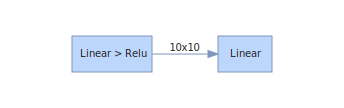

In [13]:
# viz model
hl_graph = hl.build_graph(model, torch.zeros([10, inp]))
hl_graph.theme = hl.graph.THEMES["blue"].copy() 
hl_graph

In [14]:
# learning rate for the model
learning_rate = 1e-3

In [15]:
# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
# training the model in batches

total_batches = len(train_loader)
num_epochs = 1000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        
        # prediction
        output = model(features)
        
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if(epoch % 200 == 0):
            print('Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_batches, loss.item()))

Epoch [1/1000], Batch [1/6], Loss: 21117428.0000
Epoch [1/1000], Batch [2/6], Loss: 20509598.0000
Epoch [1/1000], Batch [3/6], Loss: 21048006.0000
Epoch [1/1000], Batch [4/6], Loss: 19726496.0000
Epoch [1/1000], Batch [5/6], Loss: 23025250.0000
Epoch [1/1000], Batch [6/6], Loss: 22714436.0000
Epoch [201/1000], Batch [1/6], Loss: 363274.4062
Epoch [201/1000], Batch [2/6], Loss: 346939.5938
Epoch [201/1000], Batch [3/6], Loss: 410559.4688
Epoch [201/1000], Batch [4/6], Loss: 419647.1250
Epoch [201/1000], Batch [5/6], Loss: 471091.7188
Epoch [201/1000], Batch [6/6], Loss: 464130.0938
Epoch [401/1000], Batch [1/6], Loss: 391497.0000
Epoch [401/1000], Batch [2/6], Loss: 530350.8125
Epoch [401/1000], Batch [3/6], Loss: 435853.0000
Epoch [401/1000], Batch [4/6], Loss: 362721.0938
Epoch [401/1000], Batch [5/6], Loss: 322429.8750
Epoch [401/1000], Batch [6/6], Loss: 416829.9375
Epoch [601/1000], Batch [1/6], Loss: 342842.4688
Epoch [601/1000], Batch [2/6], Loss: 366178.4062
Epoch [601/1000], Ba

In [17]:
# before we can use NN for prediction, switch to evaluation mode
# because there are layers in NN that perform differently during training and prediction phases

model.eval()

with torch.no_grad():
    y_pred_tensor = model(x_test_tensors)

In [18]:
y_pred = y_pred_tensor.detach().numpy()

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8880623536521037

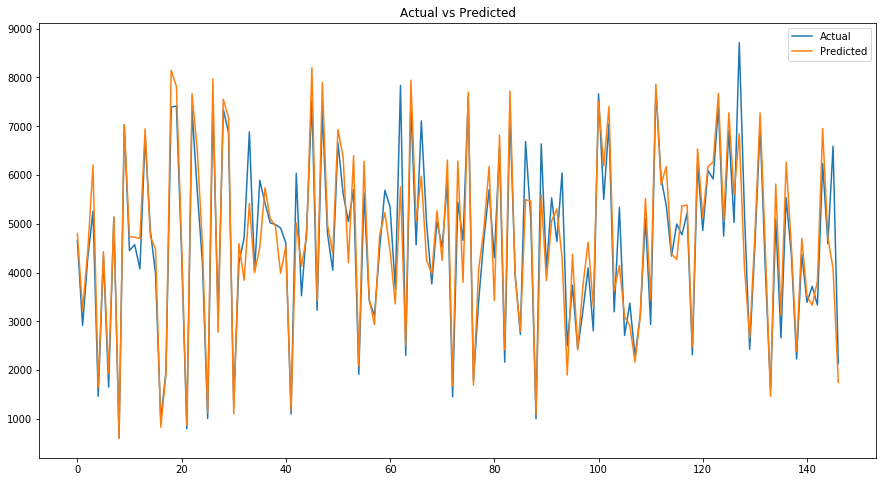

In [20]:
# actual plot of the data
plt.figure(figsize=(15,8))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()